<a href="https://colab.research.google.com/github/mka-2000/excelr2/blob/main/ANN_Assignment(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1) We are given with the Forest Fires dataset.
# We need to predict the burned area of the forest fires using Neural Networks.

**Forest Fire Dataset**

In [ ]:
# Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import adam_v2
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# Load the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
# Read the Dataset

In [ ]:
ff = pd.read_csv('forestfires.csv')

In [ ]:
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
# Basic information of the dataset 

In [ ]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
# Checking for null values

In [ ]:
ff.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
# No null values in the dataset,So proceed further

In [ ]:
ff.shape

(517, 31)

In [ ]:
f1 = ff.iloc[:,0:11]
forest = pd.concat([f1,ff['size_category']],axis=1)
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


<AxesSubplot:xlabel='temp', ylabel='wind'>

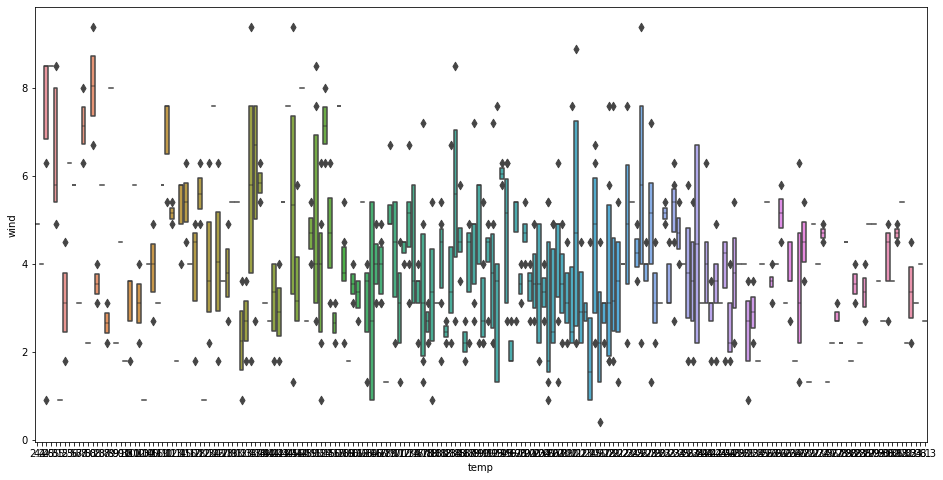

In [ ]:
plt.figure(figsize = (16, 8));
sns.boxenplot(x = 'temp', y = 'wind', data = f1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

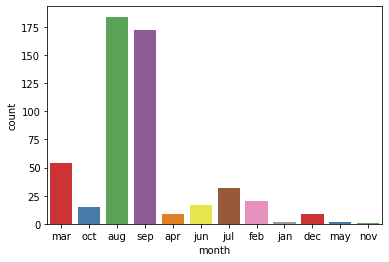

In [ ]:
sns.countplot(f1['month'], palette="Set1")

<AxesSubplot:xlabel='DMC', ylabel='DC'>

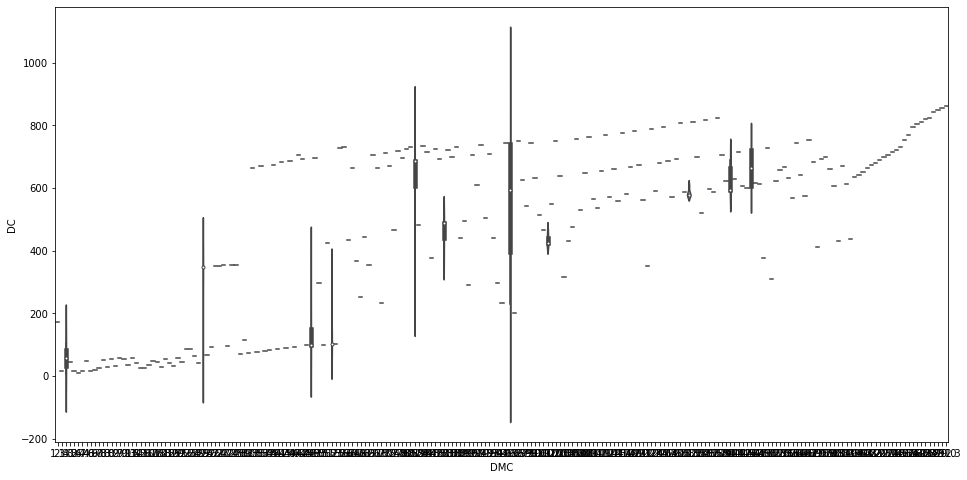

In [ ]:
plt.figure(figsize = (16, 8));
sns.violinplot(x = 'DMC', y = 'DC', data = f1)

In [ ]:
# Label Encoding For Categorical Datas.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest['month']= label_encoder.fit_transform(forest['month']) 
forest['day']= label_encoder.fit_transform(forest['day'])
forest['size_category']= label_encoder.fit_transform(forest['size_category'])

In [ ]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [ ]:
x=forest.iloc[:,0:11]
y=forest.iloc[:,-1]
x.head(7)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [ ]:
# Pairplots of the dataset

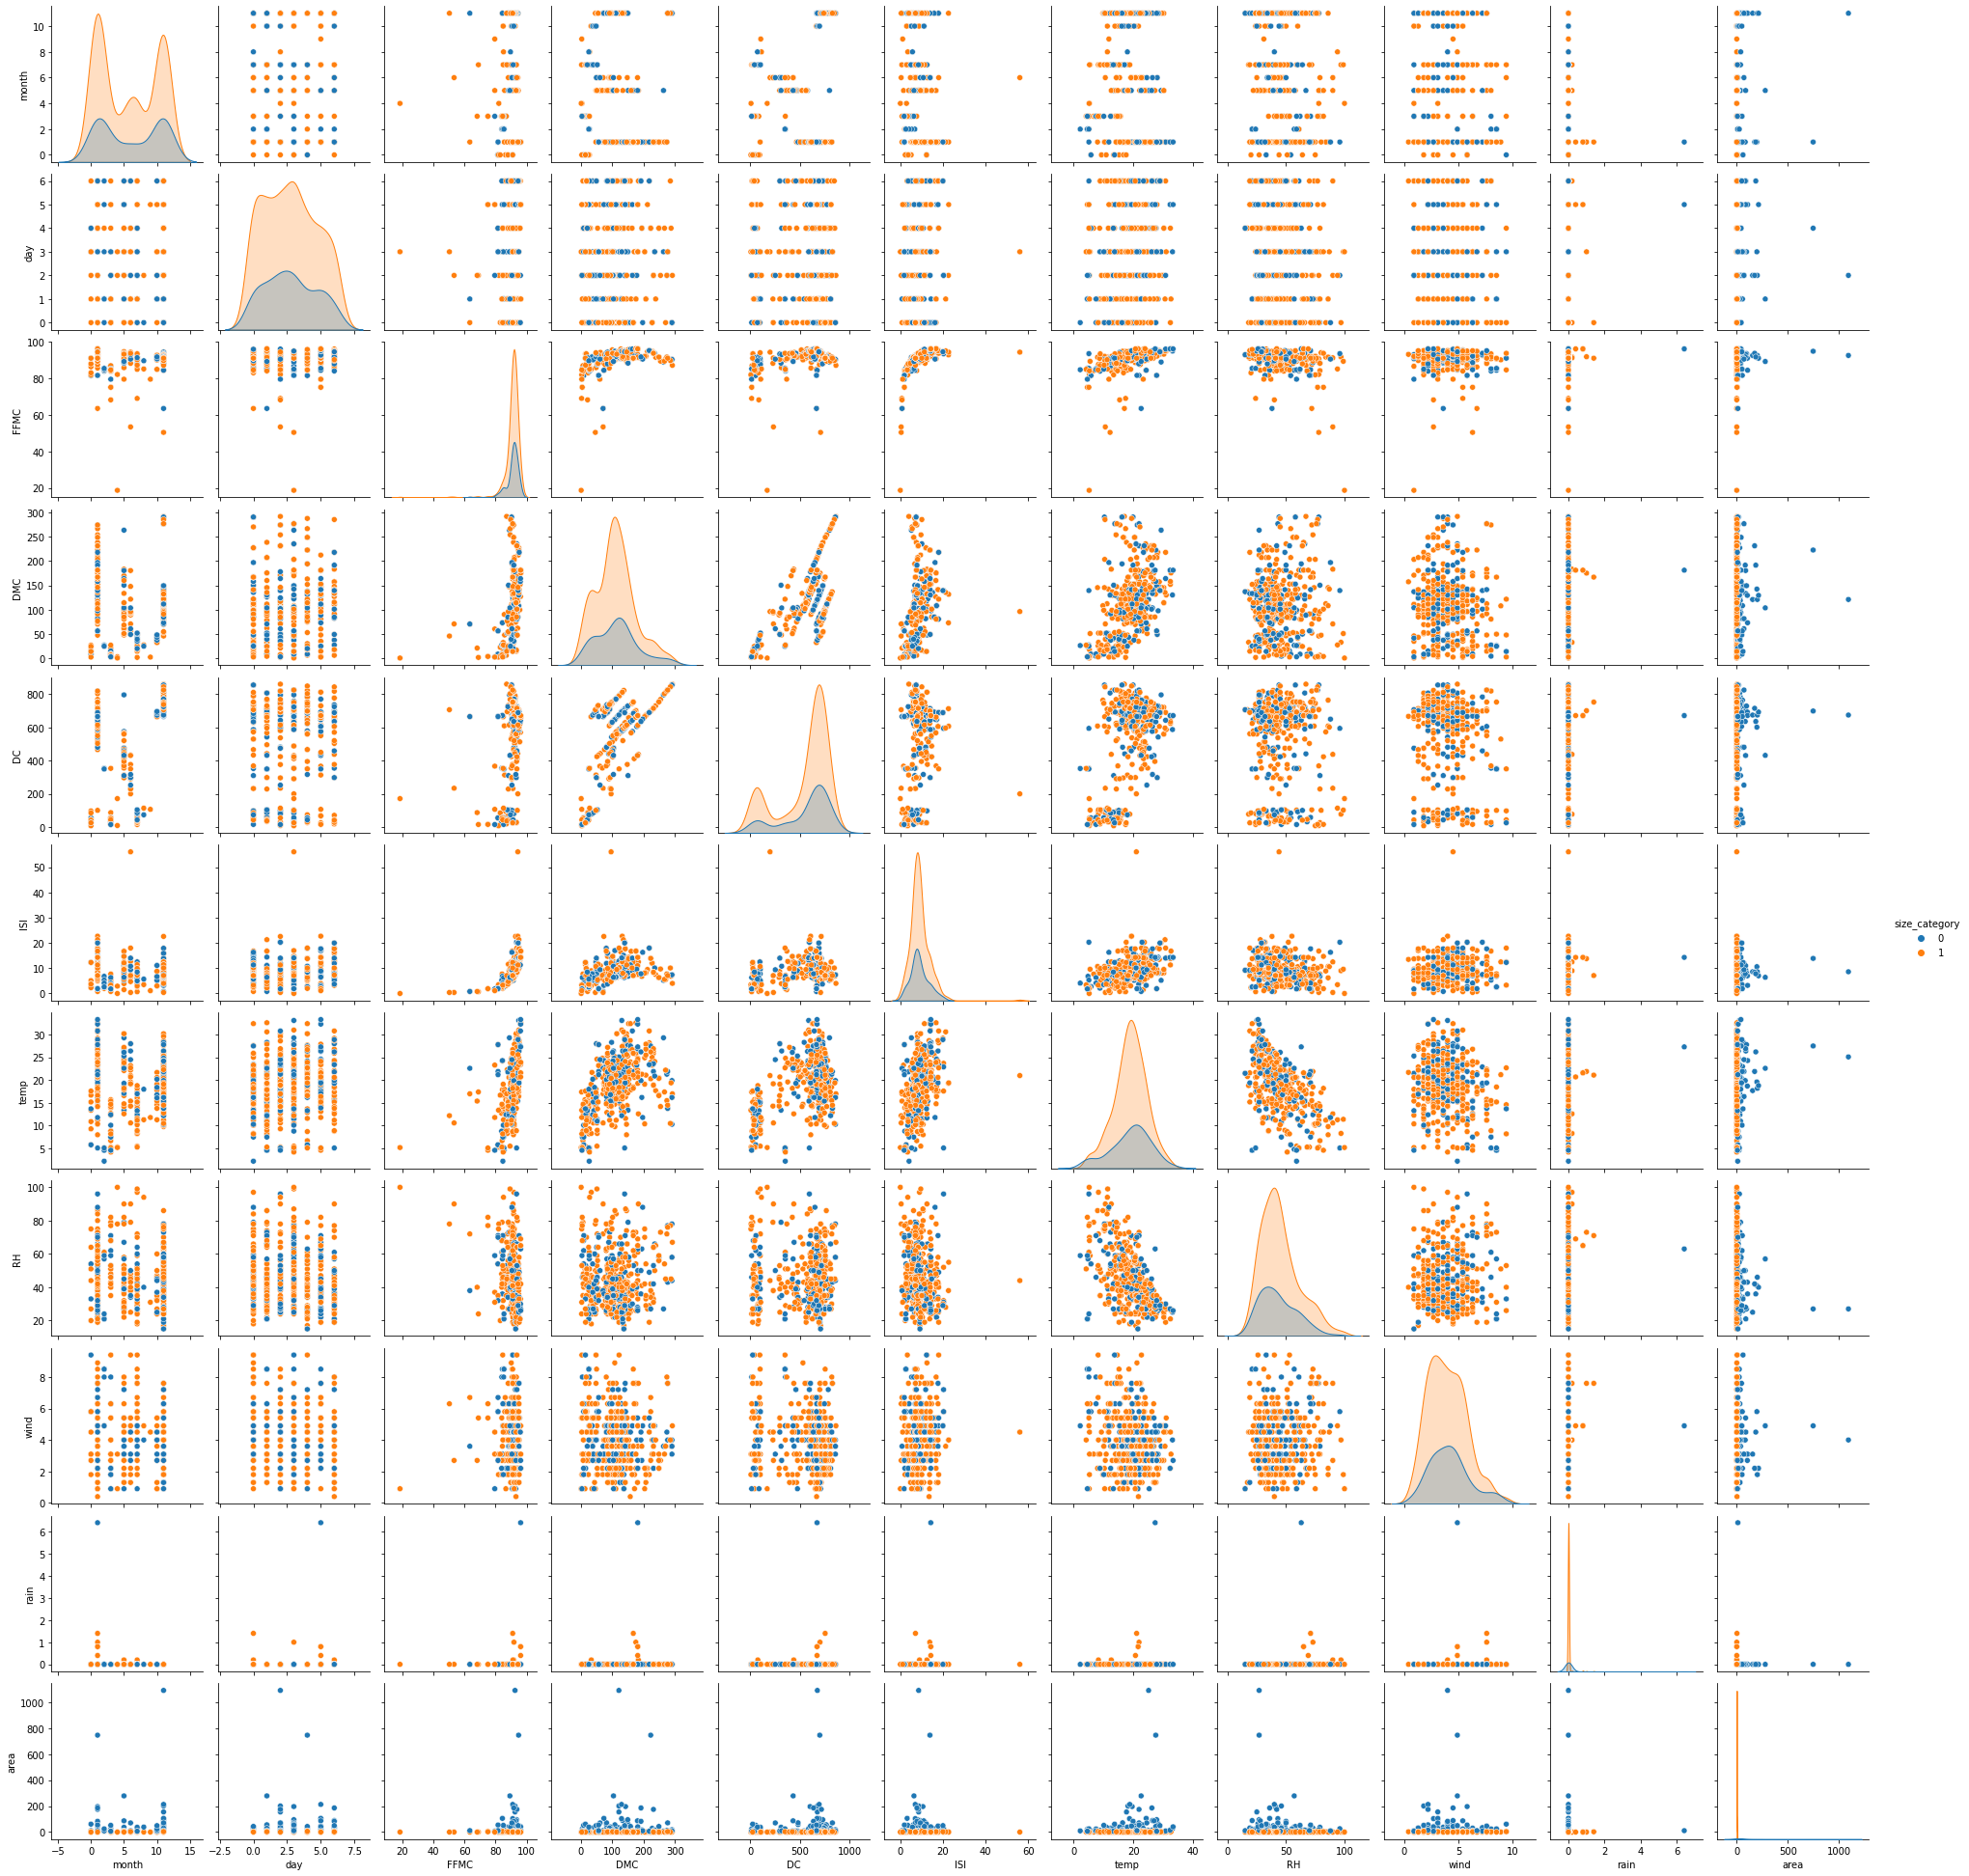

In [ ]:
sns.pairplot(forest, hue='size_category')

In [ ]:
forest.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001


Neural Network

In [ ]:
np.random.seed(10)

# split into input (X) and output (Y) variables
X = forest.iloc[:,0:11]
Y = forest.iloc[:,-1]

In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

Batch Size

In [ ]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=11,  activation='relu')) #1st layer
model.add(Dense(11,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 17ms/step - loss: 1.6927 - accuracy: 0.6965 - val_loss: 0.8703 - val_accuracy: 0.7251
Epoch 2/250
35/35 [==============================] - 0s 10ms/step - loss: 0.6988 - accuracy: 0.7688 - val_loss: 0.7016 - val_accuracy: 0.7251
Epoch 3/250
35/35 [==============================] - 1s 16ms/step - loss: 0.5927 - accuracy: 0.7803 - val_loss: 0.7534 - val_accuracy: 0.7485
Epoch 4/250
35/35 [==============================] - 0s 14ms/step - loss: 0.5271 - accuracy: 0.8006 - val_loss: 0.7856 - val_accuracy: 0.7485
Epoch 5/250
35/35 [==============================] - 0s 8ms/step - loss: 0.5377 - accuracy: 0.7717 - val_loss: 0.6131 - val_accuracy: 0.7427
Epoch 6/250
35/35 [==============================] - 0s 6ms/step - loss: 0.4937 - accuracy: 0.8035 - val_loss: 0.7320 - val_accuracy: 0.7427
Epoch 7/250
35/35 [==============================] - 0s 7ms/step - loss: 0.4618 - accuracy: 0.8121 - val_loss: 0.7522 - val_accuracy: 0.7310
Epoch 8/2

In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 5ms/step - loss: 0.0807 - accuracy: 0.9710
accuracy: 97.10%


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
scores

[0.08074250817298889, 0.9709864854812622]

In [ ]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

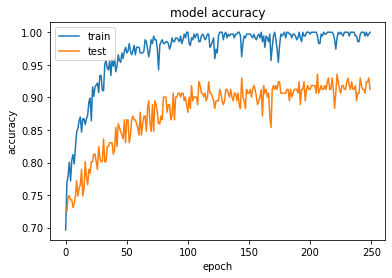

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

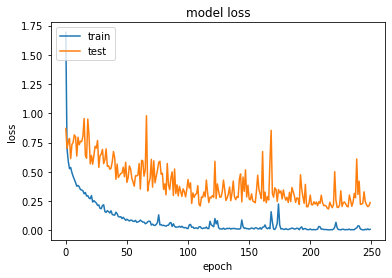

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Neural Network HyperParameter

In [ ]:
# Standardization

a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [ ]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,0.055339,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


Creating model 

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(15, input_dim=11, init='uniform', activation='relu'))
    model.add(Dense(11, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

<ipython-input-44-fde82b13e58c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Tuning of Hyperparameters using different techniques
1. Batch Size and Epochs
2. Learning rate and Drop out rate
3. Activation Function and Kernel Initializer
4. Number of Neurons in Activation layer
5. Training model with optimum values of Hyperparameters 

2. Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate, dropout_rate):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = learning_rate)

    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    
    return model

In [ ]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)

<ipython-input-46-cf1325ff59d8>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [ ]:
# Define the grid search parameters

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,
                   dropout_rate = dropout_rate)

In [ ]:
# Build and fit the GridSearchCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,
                    param_grid = param_grids,
                    cv = 10)

grid_result = grid.fit(X_standardized,Y)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.8/dist-packages/k

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9747737526893616, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8935897409915924,0.09356963184854108 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9592760145664215,0.03613344256645345 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9575037717819214,0.04922628592086994 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8820135772228241,0.12296546671803009 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9670814514160156,0.031159195257758822 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9670437455177308,0.03002947607098253 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8762066423892975,0.1270524305026445 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9747737526893616,0.026048384073977866 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9631221711635589,0.03295970890218572 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Activation and Kernel initialization

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(11,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [ ]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)

<ipython-input-53-cf1325ff59d8>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [ ]:
# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)

In [ ]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv =10,
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.0s
[CV 2/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.3s
[CV 3/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.0s
[CV 4/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 1/12] END activation_function=softmax, init=uniform;, score=0.500 total time=   2.1s
[CV 5/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 1/12] END activation_function=softmax, init=uniform;, score=0.346 total time=   2.1s
[CV 6/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 1/12] END activation_function=softmax, init=uniform;, score=0.692 total time=   1.9s
[CV 7/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 1/12] END activation_function=softmax, init=uniform;, score=0.769 total time=   3.5s
[CV 8/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 1/12] END activation_function=softmax, init=uniform;, score=0.608 total time=   2.1s
[CV 9/10; 1/12] START activation_function=softmax, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 1/12] END activation_function=softmax, init=uniform;, score=0.765 total time=   2.1s
[CV 10/10; 1/12] START activation_function=softmax, init=uniform................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 1/12] END activation_function=softmax, init=uniform;, score=0.627 total time=   2.1s
[CV 1/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   3.4s
[CV 2/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   2.7s
[CV 3/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   2.0s
[CV 4/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 2/12] END activation_function=softmax, init=normal;, score=0.500 total time=   2.1s
[CV 5/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 2/12] END activation_function=softmax, init=normal;, score=0.346 total time=   3.4s
[CV 6/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 2/12] END activation_function=softmax, init=normal;, score=0.692 total time=   2.2s
[CV 7/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 2/12] END activation_function=softmax, init=normal;, score=0.769 total time=   3.7s
[CV 8/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 2/12] END activation_function=softmax, init=normal;, score=0.608 total time=   2.0s
[CV 9/10; 2/12] START activation_function=softmax, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 2/12] END activation_function=softmax, init=normal;, score=0.765 total time=   2.1s
[CV 10/10; 2/12] START activation_function=softmax, init=normal.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 2/12] END activation_function=softmax, init=normal;, score=0.627 total time=   2.0s
[CV 1/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.1s
[CV 2/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.9s
[CV 3/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.1s
[CV 4/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 3/12] END activation_function=softmax, init=zero;, score=0.500 total time=   2.1s
[CV 5/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 3/12] END activation_function=softmax, init=zero;, score=0.346 total time=   2.0s
[CV 6/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 3/12] END activation_function=softmax, init=zero;, score=0.692 total time=   1.9s
[CV 7/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 3/12] END activation_function=softmax, init=zero;, score=0.769 total time=   2.2s
[CV 8/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 3/12] END activation_function=softmax, init=zero;, score=0.608 total time=   3.6s
[CV 9/10; 3/12] START activation_function=softmax, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 3/12] END activation_function=softmax, init=zero;, score=0.765 total time=   2.1s
[CV 10/10; 3/12] START activation_function=softmax, init=zero...................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 3/12] END activation_function=softmax, init=zero;, score=0.627 total time=   2.1s
[CV 1/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   2.1s
[CV 2/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   1.9s
[CV 3/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   3.6s
[CV 4/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 4/12] END activation_function=relu, init=uniform;, score=0.712 total time=   2.1s
[CV 5/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 4/12] END activation_function=relu, init=uniform;, score=0.942 total time=   1.9s
[CV 6/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 4/12] END activation_function=relu, init=uniform;, score=0.750 total time=   2.1s
[CV 7/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 4/12] END activation_function=relu, init=uniform;, score=0.885 total time=   2.1s
[CV 8/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 4/12] END activation_function=relu, init=uniform;, score=0.902 total time=   4.8s
[CV 9/10; 4/12] START activation_function=relu, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 4/12] END activation_function=relu, init=uniform;, score=0.863 total time=   2.2s
[CV 10/10; 4/12] START activation_function=relu, init=uniform...................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 4/12] END activation_function=relu, init=uniform;, score=0.824 total time=   2.2s
[CV 1/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   2.7s
[CV 2/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   3.5s
[CV 3/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   2.1s
[CV 4/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 5/12] END activation_function=relu, init=normal;, score=0.615 total time=   2.1s
[CV 5/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 5/12] END activation_function=relu, init=normal;, score=0.942 total time=   2.0s
[CV 6/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 5/12] END activation_function=relu, init=normal;, score=0.769 total time=   1.9s
[CV 7/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 5/12] END activation_function=relu, init=normal;, score=0.846 total time=   2.1s
[CV 8/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 5/12] END activation_function=relu, init=normal;, score=0.863 total time=   2.6s
[CV 9/10; 5/12] START activation_function=relu, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 5/12] END activation_function=relu, init=normal;, score=0.863 total time=   2.1s
[CV 10/10; 5/12] START activation_function=relu, init=normal....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 5/12] END activation_function=relu, init=normal;, score=0.863 total time=   2.1s
[CV 1/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.9s
[CV 2/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.9s
[CV 3/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   3.4s
[CV 4/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 6/12] END activation_function=relu, init=zero;, score=0.500 total time=   2.1s
[CV 5/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 6/12] END activation_function=relu, init=zero;, score=0.346 total time=   2.1s
[CV 6/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 6/12] END activation_function=relu, init=zero;, score=0.692 total time=   2.6s
[CV 7/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 6/12] END activation_function=relu, init=zero;, score=0.769 total time=   2.1s
[CV 8/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 6/12] END activation_function=relu, init=zero;, score=0.608 total time=   2.5s
[CV 9/10; 6/12] START activation_function=relu, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 6/12] END activation_function=relu, init=zero;, score=0.765 total time=   2.4s
[CV 10/10; 6/12] START activation_function=relu, init=zero......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 6/12] END activation_function=relu, init=zero;, score=0.627 total time=   2.9s
[CV 1/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   1.9s
[CV 2/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.1s
[CV 3/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.1s
[CV 4/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 7/12] END activation_function=tanh, init=uniform;, score=0.827 total time=   2.6s
[CV 5/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   1.9s
[CV 6/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 7/12] END activation_function=tanh, init=uniform;, score=0.942 total time=   3.4s
[CV 7/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 7/12] END activation_function=tanh, init=uniform;, score=0.942 total time=   2.3s
[CV 8/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 7/12] END activation_function=tanh, init=uniform;, score=0.961 total time=   2.3s
[CV 9/10; 7/12] START activation_function=tanh, init=uniform....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 7/12] END activation_function=tanh, init=uniform;, score=0.902 total time=   3.7s
[CV 10/10; 7/12] START activation_function=tanh, init=uniform...................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 7/12] END activation_function=tanh, init=uniform;, score=0.941 total time=   2.0s
[CV 1/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.1s
[CV 2/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.1s
[CV 3/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.1s
[CV 4/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 8/12] END activation_function=tanh, init=normal;, score=0.788 total time=   3.7s
[CV 5/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.1s
[CV 6/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 8/12] END activation_function=tanh, init=normal;, score=0.923 total time=   2.1s
[CV 7/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 8/12] END activation_function=tanh, init=normal;, score=0.885 total time=   2.1s
[CV 8/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 8/12] END activation_function=tanh, init=normal;, score=0.941 total time=   2.0s
[CV 9/10; 8/12] START activation_function=tanh, init=normal.....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 8/12] END activation_function=tanh, init=normal;, score=0.882 total time=   3.6s
[CV 10/10; 8/12] START activation_function=tanh, init=normal....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 8/12] END activation_function=tanh, init=normal;, score=0.922 total time=   3.6s
[CV 1/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   2.1s
[CV 2/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   2.1s
[CV 3/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   2.1s
[CV 4/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 9/12] END activation_function=tanh, init=zero;, score=0.500 total time=   2.6s
[CV 5/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 9/12] END activation_function=tanh, init=zero;, score=0.346 total time=   2.1s
[CV 6/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 9/12] END activation_function=tanh, init=zero;, score=0.692 total time=   1.9s
[CV 7/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 9/12] END activation_function=tanh, init=zero;, score=0.769 total time=   2.1s
[CV 8/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 9/12] END activation_function=tanh, init=zero;, score=0.608 total time=   2.1s
[CV 9/10; 9/12] START activation_function=tanh, init=zero.......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 9/12] END activation_function=tanh, init=zero;, score=0.765 total time=   3.4s
[CV 10/10; 9/12] START activation_function=tanh, init=zero......................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 9/12] END activation_function=tanh, init=zero;, score=0.627 total time=   2.0s
[CV 1/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   1.9s
[CV 2/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.1s
[CV 3/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.1s
[CV 4/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 10/12] END activation_function=linear, init=uniform;, score=0.827 total time=   2.1s
[CV 5/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 10/12] END activation_function=linear, init=uniform;, score=0.981 total time=   3.7s
[CV 6/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 10/12] END activation_function=linear, init=uniform;, score=0.942 total time=   2.2s
[CV 7/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 10/12] END activation_function=linear, init=uniform;, score=0.904 total time=   2.2s
[CV 8/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 10/12] END activation_function=linear, init=uniform;, score=0.941 total time=   2.2s
[CV 9/10; 10/12] START activation_function=linear, init=uniform.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 10/12] END activation_function=linear, init=uniform;, score=0.882 total time=   3.4s
[CV 10/10; 10/12] START activation_function=linear, init=uniform................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 10/12] END activation_function=linear, init=uniform;, score=0.922 total time=   2.0s
[CV 1/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.9s
[CV 2/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.1s
[CV 3/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.0s
[CV 4/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 11/12] END activation_function=linear, init=normal;, score=0.808 total time=   2.2s
[CV 5/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 11/12] END activation_function=linear, init=normal;, score=0.981 total time=   3.9s
[CV 6/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 11/12] END activation_function=linear, init=normal;, score=0.904 total time=   1.9s
[CV 7/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 11/12] END activation_function=linear, init=normal;, score=0.904 total time=   1.9s
[CV 8/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 11/12] END activation_function=linear, init=normal;, score=0.941 total time=   2.1s
[CV 9/10; 11/12] START activation_function=linear, init=normal..................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 11/12] END activation_function=linear, init=normal;, score=0.902 total time=   2.0s
[CV 10/10; 11/12] START activation_function=linear, init=normal.................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 11/12] END activation_function=linear, init=normal;, score=0.902 total time=   3.5s
[CV 1/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   2.1s
[CV 2/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   2.1s
[CV 3/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   2.1s
[CV 4/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 12/12] END activation_function=linear, init=zero;, score=0.500 total time=   2.1s
[CV 5/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 12/12] END activation_function=linear, init=zero;, score=0.346 total time=   3.3s
[CV 6/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 12/12] END activation_function=linear, init=zero;, score=0.692 total time=   2.0s
[CV 7/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 12/12] END activation_function=linear, init=zero;, score=0.769 total time=   1.9s
[CV 8/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 12/12] END activation_function=linear, init=zero;, score=0.608 total time=   2.0s
[CV 9/10; 12/12] START activation_function=linear, init=zero....................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 12/12] END activation_function=linear, init=zero;, score=0.765 total time=   2.1s
[CV 10/10; 12/12] START activation_function=linear, init=zero...................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 12/12] END activation_function=linear, init=zero;, score=0.627 total time=   2.2s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9515460073947907, using {'activation_function': 'tanh', 'init': 'uniform'}
0.7307692408561707,0.21178640135635426 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7307692408561707,0.21178640135635426 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7307692408561707,0.21178640135635426 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8876696825027466,0.0978588499286765 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8761312305927277,0.11456982225129811 with: {'activation_function': 'relu', 'init': 'normal'}
0.7307692408561707,0.21178640135635426 with: {'activation_function': 'relu', 'init': 'zero'}
0.9515460073947907,0.05267285176413743 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9341251909732818,0.06636029966057162 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7307692408561707,0.21178640135635426 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9398944199085235,0.054977375285289246 with: {'activati

Number of neurons in the activation layer

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model

In [ ]:
# Create the model

model = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)

<ipython-input-60-cf1325ff59d8>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


In [ ]:
# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,
                   neuron2 = neuron2)

In [ ]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,
                    param_grid = param_grids,
                    cv = 10,
                    verbose = 10)

grid_result = grid.fit(X_standardized,Y)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 1/9] END ........neuron1=4, neuron2=2;, score=1.000 total time=   4.0s
[CV 2/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 1/9] END ........neuron1=4, neuron2=2;, score=1.000 total time=   2.1s
[CV 3/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 1/9] END ........neuron1=4, neuron2=2;, score=1.000 total time=   3.4s
[CV 4/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 1/9] END ........neuron1=4, neuron2=2;, score=0.500 total time=   2.3s
[CV 5/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 1/9] END ........neuron1=4, neuron2=2;, score=0.596 total time=   2.3s
[CV 6/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 1/9] END ........neuron1=4, neuron2=2;, score=0.712 total time=   3.8s
[CV 7/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 1/9] END ........neuron1=4, neuron2=2;, score=0.827 total time=   2.4s
[CV 8/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 1/9] END ........neuron1=4, neuron2=2;, score=0.706 total time=   3.9s
[CV 9/10; 1/9] START neuron1=4, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 1/9] END ........neuron1=4, neuron2=2;, score=0.824 total time=   2.1s
[CV 10/10; 1/9] START neuron1=4, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 1/9] END .......neuron1=4, neuron2=2;, score=0.784 total time=   3.7s
[CV 1/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 2/9] END ........neuron1=4, neuron2=4;, score=1.000 total time=   1.9s
[CV 2/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 2/9] END ........neuron1=4, neuron2=4;, score=1.000 total time=   1.8s
[CV 3/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 2/9] END ........neuron1=4, neuron2=4;, score=1.000 total time=   1.9s
[CV 4/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 2/9] END ........neuron1=4, neuron2=4;, score=0.500 total time=   2.1s
[CV 5/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 2/9] END ........neuron1=4, neuron2=4;, score=0.808 total time=   3.4s
[CV 6/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 2/9] END ........neuron1=4, neuron2=4;, score=0.712 total time=   2.1s
[CV 7/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 2/9] END ........neuron1=4, neuron2=4;, score=0.827 total time=   1.9s
[CV 8/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 2/9] END ........neuron1=4, neuron2=4;, score=0.784 total time=   2.1s
[CV 9/10; 2/9] START neuron1=4, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 2/9] END ........neuron1=4, neuron2=4;, score=0.824 total time=   1.9s
[CV 10/10; 2/9] START neuron1=4, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 2/9] END .......neuron1=4, neuron2=4;, score=0.804 total time=   1.9s
[CV 1/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 3/9] END ........neuron1=4, neuron2=8;, score=1.000 total time=   2.6s
[CV 2/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 3/9] END ........neuron1=4, neuron2=8;, score=1.000 total time=   1.8s
[CV 3/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 3/9] END ........neuron1=4, neuron2=8;, score=1.000 total time=   1.8s
[CV 4/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 3/9] END ........neuron1=4, neuron2=8;, score=0.538 total time=   2.1s
[CV 5/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 3/9] END ........neuron1=4, neuron2=8;, score=0.942 total time=   1.8s
[CV 6/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 3/9] END ........neuron1=4, neuron2=8;, score=0.769 total time=   2.0s
[CV 7/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 3/9] END ........neuron1=4, neuron2=8;, score=0.846 total time=   3.6s
[CV 8/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 3/9] END ........neuron1=4, neuron2=8;, score=0.863 total time=   2.1s
[CV 9/10; 3/9] START neuron1=4, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 3/9] END ........neuron1=4, neuron2=8;, score=0.863 total time=   2.1s
[CV 10/10; 3/9] START neuron1=4, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 3/9] END .......neuron1=4, neuron2=8;, score=0.843 total time=   2.2s
[CV 1/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 4/9] END ........neuron1=8, neuron2=2;, score=1.000 total time=   2.2s
[CV 2/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 4/9] END ........neuron1=8, neuron2=2;, score=1.000 total time=   4.3s
[CV 3/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 4/9] END ........neuron1=8, neuron2=2;, score=1.000 total time=   2.4s
[CV 4/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 4/9] END ........neuron1=8, neuron2=2;, score=0.500 total time=   2.4s
[CV 5/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 4/9] END ........neuron1=8, neuron2=2;, score=0.865 total time=   2.3s
[CV 6/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 4/9] END ........neuron1=8, neuron2=2;, score=0.731 total time=   3.7s
[CV 7/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 4/9] END ........neuron1=8, neuron2=2;, score=0.827 total time=   2.2s
[CV 8/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 4/9] END ........neuron1=8, neuron2=2;, score=0.765 total time=   2.1s
[CV 9/10; 4/9] START neuron1=8, neuron2=2.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 4/9] END ........neuron1=8, neuron2=2;, score=0.824 total time=   2.1s
[CV 10/10; 4/9] START neuron1=8, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 4/9] END .......neuron1=8, neuron2=2;, score=0.824 total time=   1.9s
[CV 1/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 5/9] END ........neuron1=8, neuron2=4;, score=1.000 total time=   2.2s
[CV 2/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 5/9] END ........neuron1=8, neuron2=4;, score=1.000 total time=   3.7s
[CV 3/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 5/9] END ........neuron1=8, neuron2=4;, score=1.000 total time=   1.9s
[CV 4/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 5/9] END ........neuron1=8, neuron2=4;, score=0.538 total time=   1.9s
[CV 5/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 5/9] END ........neuron1=8, neuron2=4;, score=0.942 total time=   2.1s
[CV 6/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 5/9] END ........neuron1=8, neuron2=4;, score=0.808 total time=   2.1s
[CV 7/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 5/9] END ........neuron1=8, neuron2=4;, score=0.885 total time=   3.7s
[CV 8/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 5/9] END ........neuron1=8, neuron2=4;, score=0.863 total time=   2.1s
[CV 9/10; 5/9] START neuron1=8, neuron2=4.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 5/9] END ........neuron1=8, neuron2=4;, score=0.863 total time=   1.9s
[CV 10/10; 5/9] START neuron1=8, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 5/9] END .......neuron1=8, neuron2=4;, score=0.863 total time=   1.9s
[CV 1/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 6/9] END ........neuron1=8, neuron2=8;, score=1.000 total time=   2.1s
[CV 2/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 6/9] END ........neuron1=8, neuron2=8;, score=1.000 total time=   3.4s
[CV 3/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 6/9] END ........neuron1=8, neuron2=8;, score=1.000 total time=   2.7s
[CV 4/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 6/9] END ........neuron1=8, neuron2=8;, score=0.558 total time=   2.1s
[CV 5/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 6/9] END ........neuron1=8, neuron2=8;, score=0.942 total time=   1.9s
[CV 6/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 6/9] END ........neuron1=8, neuron2=8;, score=0.827 total time=   1.8s
[CV 7/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 6/9] END ........neuron1=8, neuron2=8;, score=0.885 total time=   3.4s
[CV 8/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 6/9] END ........neuron1=8, neuron2=8;, score=0.882 total time=   2.1s
[CV 9/10; 6/9] START neuron1=8, neuron2=8.......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 6/9] END ........neuron1=8, neuron2=8;, score=0.863 total time=   1.9s
[CV 10/10; 6/9] START neuron1=8, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 6/9] END .......neuron1=8, neuron2=8;, score=0.863 total time=   1.9s
[CV 1/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 7/9] END .......neuron1=16, neuron2=2;, score=1.000 total time=   3.4s
[CV 2/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 7/9] END .......neuron1=16, neuron2=2;, score=1.000 total time=   3.8s
[CV 3/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 7/9] END .......neuron1=16, neuron2=2;, score=1.000 total time=   2.3s
[CV 4/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 7/9] END .......neuron1=16, neuron2=2;, score=0.538 total time=   2.3s
[CV 5/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 7/9] END .......neuron1=16, neuron2=2;, score=0.942 total time=   2.0s
[CV 6/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 7/9] END .......neuron1=16, neuron2=2;, score=0.788 total time=   2.0s
[CV 7/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 7/9] END .......neuron1=16, neuron2=2;, score=0.885 total time=   3.5s
[CV 8/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 7/9] END .......neuron1=16, neuron2=2;, score=0.863 total time=   1.9s
[CV 9/10; 7/9] START neuron1=16, neuron2=2......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 7/9] END .......neuron1=16, neuron2=2;, score=0.863 total time=   1.9s
[CV 10/10; 7/9] START neuron1=16, neuron2=2.....................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 7/9] END ......neuron1=16, neuron2=2;, score=0.843 total time=   1.9s
[CV 1/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 8/9] END .......neuron1=16, neuron2=4;, score=1.000 total time=   2.1s
[CV 2/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 8/9] END .......neuron1=16, neuron2=4;, score=1.000 total time=   2.2s
[CV 3/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 8/9] END .......neuron1=16, neuron2=4;, score=1.000 total time=   2.5s
[CV 4/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 8/9] END .......neuron1=16, neuron2=4;, score=0.615 total time=   2.0s
[CV 5/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 8/9] END .......neuron1=16, neuron2=4;, score=0.962 total time=   2.1s
[CV 6/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 8/9] END .......neuron1=16, neuron2=4;, score=0.808 total time=   1.9s
[CV 7/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 8/9] END .......neuron1=16, neuron2=4;, score=0.885 total time=   2.1s
[CV 8/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 8/9] END .......neuron1=16, neuron2=4;, score=0.902 total time=   3.4s
[CV 9/10; 8/9] START neuron1=16, neuron2=4......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 8/9] END .......neuron1=16, neuron2=4;, score=0.863 total time=   1.9s
[CV 10/10; 8/9] START neuron1=16, neuron2=4.....................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 8/9] END ......neuron1=16, neuron2=4;, score=0.863 total time=   2.1s
[CV 1/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/10; 9/9] END .......neuron1=16, neuron2=8;, score=1.000 total time=   2.1s
[CV 2/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/10; 9/9] END .......neuron1=16, neuron2=8;, score=1.000 total time=   2.1s
[CV 3/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/10; 9/9] END .......neuron1=16, neuron2=8;, score=1.000 total time=   2.2s
[CV 4/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/10; 9/9] END .......neuron1=16, neuron2=8;, score=0.769 total time=   2.4s
[CV 5/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/10; 9/9] END .......neuron1=16, neuron2=8;, score=0.981 total time=   2.1s
[CV 6/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 6/10; 9/9] END .......neuron1=16, neuron2=8;, score=0.942 total time=   2.1s
[CV 7/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 7/10; 9/9] END .......neuron1=16, neuron2=8;, score=0.904 total time=   2.1s
[CV 8/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 8/10; 9/9] END .......neuron1=16, neuron2=8;, score=0.941 total time=   1.8s
[CV 9/10; 9/9] START neuron1=16, neuron2=8......................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 9/10; 9/9] END .......neuron1=16, neuron2=8;, score=0.882 total time=   2.1s
[CV 10/10; 9/9] START neuron1=16, neuron2=8.....................................


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 10/10; 9/9] END ......neuron1=16, neuron2=8;, score=0.922 total time=   2.4s


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9341251909732818, using {'neuron1': 16, 'neuron2': 8}
0.7948340892791748,0.16416287812640895 with: {'neuron1': 4, 'neuron2': 2}
0.8257918536663056,0.14586718134936638 with: {'neuron1': 4, 'neuron2': 4}
0.8664781391620636,0.1331435505282249 with: {'neuron1': 4, 'neuron2': 8}
0.8334841668605805,0.145235653658733 with: {'neuron1': 8, 'neuron2': 2}
0.8761312246322632,0.13027815594223363 with: {'neuron1': 8, 'neuron2': 4}
0.8819381594657898,0.1242442785102483 with: {'neuron1': 8, 'neuron2': 8}
0.8722473680973053,0.13171356429167758 with: {'neuron1': 16, 'neuron2': 2}
0.8896681725978851,0.1119207379614184 with: {'neuron1': 16, 'neuron2': 4}
0.9341251909732818,0.06801163834475407 with: {'neuron1': 16, 'neuron2': 8}


**Conclusion**

**Hyperparameters all at once**



The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.

This process is computationally expensive.